# NTDS'18 milestone 1: network collection and properties
[Effrosyni Simou](https://lts4.epfl.ch/simou), [EPFL LTS4](https://lts4.epfl.ch)

#### Students

* Team: `47`
* Students: `Leo Capiod ; Frank Schmutz ; Harold Sussmilch ; Josef Weber`
* Dataset: `Flight Routes : airports and routes for ms 1`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to three sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective 

The purpose of this milestone is to start getting acquainted to the network that you will use for this class. In the first part of the milestone you will import your data using [Pandas](http://pandas.pydata.org) and you will create the adjacency matrix using [Numpy](http://www.numpy.org). This part is project specific. In the second part you will have to compute some basic properties of your network. **For the computation of the properties you are only allowed to use the packages that have been imported in the cell below.** You are not allowed to use any graph-specific toolboxes for this milestone (such as networkx and PyGSP). Furthermore, the aim is not to blindly compute the network properties, but to also start to think about what kind of network you will be working with this semester. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1 - Import your data and manipulate them. 

###  A. Load your data in a Panda dataframe.

First, you should define and understand what are your nodes, what features you have and what are your labels. Please provide below a Panda dataframe where each row corresponds to a node with its features and labels. For example, in the the case of the Free Music Archive (FMA) Project, each row of the dataframe would be of the following form:


| Track   |  Feature 1  | Feature 2 | . . . | Feature 518|  Label 1 |  Label 2 |. . .|Label 16|
|:-------:|:-----------:|:---------:|:-----:|:----------:|:--------:|:--------:|:---:|:------:|
|         |             |           |       |            |          |          |     |        |

It is possible that in some of the projects either the features or the labels are not available. This is OK, in that case just make sure that you create a dataframe where each of the rows corresponds to a node and its associated features or labels.

In [36]:
path = "flight_data"

nodes_col_Names = ["Airport_ID", "Name", "City", "Country", "IATA", "ICAO", "Latitude", "Longitude", "Altitude", "Timezone", "DST", "Tz_database_time_zone", "Type", "Source"]
edges_col_Names = ["Airline", "Airline_ID", "Source Airport", "Source_Airport_ID", "Destination_Airport", "Destination_Airport_ID", "Codeshare", "Stops", "Equipment"]

nodes_df = pd.read_csv(path+'/airports.dat', names = nodes_col_Names)
edges_df = pd.read_csv(path+'/routes.dat', names = edges_col_Names)

In [37]:
nodes_df.head()

,Airport_ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [38]:
edges_df.head()

,Airline,Airline_ID,Source Airport,Source_Airport_ID,Destination_Airport,Destination_Airport_ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


### B. Create the adjacency matrix of your network.

Remember that there are edges connecting the attributed nodes that you organized in the dataframe above. The connectivity of the network is captured by the adjacency matrix $W$. If $N$ is the number of nodes, the adjacency matrix is an $N \times N$ matrix where the value of $W(i,j)$ is the weight of the edge connecting node $i$ to node $j$.  

There are two possible scenarios for your adjacency matrix construction, as you already learned in the tutorial by Benjamin:

1) The edges are given to you explicitly. In this case you should simply load the file containing the edge information and parse it in order to create your adjacency matrix. See how to do that in the  [graph from edge list]() demo.

2) The edges are not given to you. In that case you will have to create a feature graph. In order to do that you will have to chose a distance that will quantify how similar two nodes are based on the values in their corresponding feature vectors. In the [graph from features]() demo Benjamin showed you how to build feature graphs when using Euclidean distances between feature vectors. Be curious and explore other distances as well! For instance, in the case of high-dimensional feature vectors, you might want to consider using the cosine distance. Once you compute the distances between your nodes you will have a fully connected network. Do not forget to sparsify by keeping the most important edges in your network.

Follow the appropriate steps for the construction of the adjacency matrix of your network and provide it in the Numpy array ``adjacency`` below: 

In [39]:
# data cleaning

#remove routes with invalid Source Airport ID or Destination Airport ID
edges_df = edges_df[edges_df['Source_Airport_ID'] != '\\N']
edges_df = edges_df[edges_df['Destination_Airport_ID'] != '\\N']

# routes contains Source_Airport_ID that are not in nodes - check if any dest is in nodes compare as types of string
filter_valid_dst_src_id = edges_df["Destination_Airport_ID"].astype(str).isin(nodes_df["Airport_ID"].astype(str)) & edges_df["Source_Airport_ID"].astype(str).isin(nodes_df["Airport_ID"].astype(str))

# assign filter of valid edges to edges_df
edges_df = edges_df[filter_valid_dst_src_id]

# watch for duplicate ids in nodes_df
duplicated_ids = nodes_df.iloc[:,0].duplicated()
nodes_df = nodes_df[~duplicated_ids]

In [40]:
# create adjacency

# https://www.youtube.com/watch?v=I_kUj-MfYys
# margin shows the total in/out degrees of a node
adjacency_routes = pd.crosstab(edges_df.iloc[:,].Source_Airport_ID, edges_df.iloc[:,].Destination_Airport_ID, margins=False)

In [41]:
# as adjacency is a numpy array we need to keep track of the different indexing as there are no col and row names
rows = adjacency_routes.index.values
cols = adjacency_routes.columns.values

# join rows with cols to have get all valid nodes
valids = np.intersect1d(rows, cols)

In [42]:
# filter only indexes that are in valids
adjacency_routes = adjacency_routes.loc[valids][valids]
nodes_df = nodes_df.set_index('Airport_ID').loc[valids.astype(int)]

In [46]:
# numpy adjacency matrix
adjacency = adjacency_routes.values

# number of valid nodes
n_nodes = len(valids)

## Part 2

Execute the cell below to plot the (weighted) adjacency matrix of your network.

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


Text(0.5,1.05,'adjacency matrix')

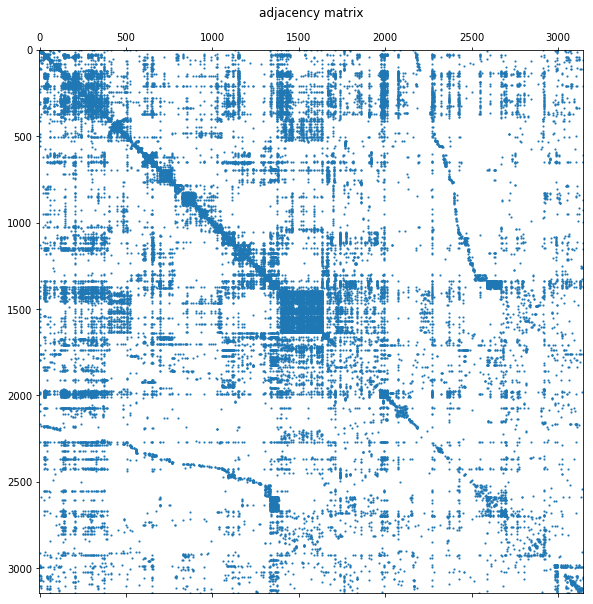

In [47]:
print(type(adjacency_routes))
print(type(adjacency))
plt.figure(figsize=(10,10))
plt.spy(adjacency, markersize=1)
plt.title('adjacency matrix')

### Question 1


What is the maximum number of links $L_{max}$ in a network with $N$ nodes (where $N$ is the number of nodes in your network)? How many links $L$ are there in your collected network? Comment on the sparsity of your network.

In [76]:
# since our graph is directed the max number of links it twice that of un undirected graph
N=n_nodes
Lmax = N*(N-1)
print("Lmax = N*(N-1)/2 = ", Lmax)
L=valids
print("L = ", len(L))

#TODO : comment on sparsity

# tells only if the object belongs to a certain class but maybe there is some functionality in sparse?!?!
#import scipy
#print(scipy.sparse.issparse(adjacency)) 

zero_ratio = (np.prod(adjacency.shape) - np.count_nonzero(adjacency))/np.prod(adjacency.shape)
print("The high zero ratio of: ", zero_ratio, "% indicates a very sparse network. Many nodes with only few connections.")



Lmax = N*(N-1)/2 =  9894170
L =  3146
The high zero ratio of:  0.9963225383528221 % indicates a very sparse network. Many nodes with only few connections.


**Your answer here.**

### Question 2

Is your graph directed or undirected? If it is directed, convert it to an undirected graph by symmetrizing the adjacency matrix.

**Your answer here.**

In [ ]:
print('The graph is', 'undirected' if np.array_equal(adjacency, adjacency.T) else 'directed')

In our case the undirected graph has edges with weights corresponding to the number of flights between two airports without distinguishing between inbound or outbound flights

In [ ]:
adjacency = adjacency + adjacency.T

### Question 3

In the cell below save the features dataframe and the **symmetrized** adjacency matrix. You can use the Pandas ``to_csv`` to save the ``features`` and Numpy's ``save`` to save the ``adjacency``. We will reuse those in the following milestones.

In [ ]:
# We need to save nodes_df, edges_df and adjacency
nodes_df.to_csv("Nodes.csv")
edges_df.to_csv("edges.csv")

np.save("adj_matr",adjacency)

### Question 4

Are the edges of your graph weighted?

Yes. The weights are the total number of flights between the two airports

### Question 5

What is the degree distibution of your network? 

In [ ]:
mask = adjacency.copy()
mask[np.nonzero(adjacency)] = 1
degree = mask.sum(axis=0)

assert len(degree) == n_nodes

Execute the cell below to see the histogram of the degree distribution.

In [ ]:
weights = np.ones_like(degree) / float(n_nodes)
plt.hist(degree, weights=weights);

What is the average degree?

In [ ]:
print('The average degree is', np.average(degree))

### Question 6

Comment on the degree distribution of your network.

We have a real world network with a power law distribution : most nodes have a relatively small degree but a few nodes have a very large degree, being connected to many other nodes. The nodes with a small degree correspond to quite small airports, mainly linked with biggest airports in their area. Most of the airports are of this kind. The airports with a really high degree are kind of hubs connected to many other airports in the world and in their region, but there are few airports of this kind.

### Question 7

Write a function that takes as input the adjacency matrix of a graph and determines whether the graph is connected or not.

In [ ]:
def depth_first_search(adjacency, initial_index):
    visited = set()
    queue = [initial_index]

    while len(queue) > 0:
        n = queue.pop()
        if not n in visited:
            visited.add(n)
            succ = np.nonzero(adjacency[n])[0]
            for elem in np.nditer(succ):
                queue.append(int(elem))
    
    connected = len(visited) == n_nodes
    
    return (connected, visited)

In [ ]:
def connected_graph(adjacency):
    """Determines whether a graph is connected.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    bool
        True if the graph is connected, False otherwise.
    """
    
    # Depth First Search to determine if connected
    (connected, visited) = depth_first_search(adjacency, 0)
    
    return connected

Is your graph connected? Run the ``connected_graph`` function to determine your answer.

In [ ]:
print('The graph is', 'connected' if connected_graph(adjacency) else 'not connected')

### Question 8

Write a function that extracts the connected components of a graph.

In [ ]:
def find_components(adjacency):
    """Find the connected components of a graph.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    list of numpy arrays
        A list of adjacency matrices, one per connected component.
    """
    
    components = []
    unvisited = set(range(n_nodes))

    while len(unvisited) > 0:
        next_initial_index = unvisited.pop()
        (connected, visited) = depth_first_search(adjacency, next_initial_index)
        unvisited = unvisited.difference(visited)
        indices = np.array(list(visited))
        components.append(adjacency[indices][:, indices])
    
    return components

How many connected components is your network composed of? What is the size of the largest connected component? Run the ``find_components`` function to determine your answer. 

In [ ]:
components = find_components(adjacency)
size = 0
for component in components:
    if len(component) > size:
        size = len(component)
        largest_connected_component_adjacency = component
print('There are', len(components), 'connected components. The largest one contains', size, 'nodes.')

### Question 9

Write a function that takes as input the adjacency matrix and a node (`source`) and returns the length of the shortest path between that node and all nodes in the graph using Dijkstra's algorithm. **For the purposes of this assignment we are interested in the hop distance between nodes, not in the sum of weights. **

Hint: You might want to mask the adjacency matrix in the function ``compute_shortest_path_lengths`` in order to make sure you obtain a binary adjacency matrix. 

In [ ]:
def compute_shortest_path_lengths(adjacency, source):
    """Compute the shortest path length between a source node and all nodes.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    
    Returns
    -------
    list of ints
        The length of the shortest path from source to all nodes. Returned list should be of length n_nodes.
    """
    
    queue = list(range(n_nodes))
    shortest_path_lengths = (np.ones(n_nodes) * np.inf).tolist()
    shortest_path_lengths[source] = 0

    exit = False
    while len(queue) > 0 and exit == False:
        queue.sort(key=lambda x: shortest_path_lengths[x])
        e = queue[0]
        path_length = shortest_path_lengths[e]

        if path_length == float('inf'):
            exit = True
        else:
            queue.remove(e)
            
            for elem in np.nonzero(adjacency[e])[0]:
                if int(elem) in queue:
                    new_path_length = path_length + 1
                    if new_path_length < shortest_path_lengths[elem]:
                        shortest_path_lengths[elem] = new_path_length
    
    return shortest_path_lengths

As specified in the forum, we run this function on the largest connected component

In [ ]:
compute_shortest_path_lengths(largest_connected_component_adjacency, 0)

### Question 10

The diameter of the graph is the length of the longest shortest path between any pair of nodes. Use the above developed function to compute the diameter of the graph (or the diameter of the largest connected component of the graph if the graph is not connected). If your graph (or largest connected component) is very large, computing the diameter will take very long. In that case downsample your graph so that it has 1.000 nodes. There are many ways to reduce the size of a graph. For the purposes of this milestone you can chose to randomly select 1.000 nodes. 

Note that since we sampled random nodes from the largest connected component it is very likely (in our case at least) that the resulting graph will not be connected. If this is the case the displayed diameter is that of the component with the biggest diameter

In [ ]:
nb_samples = 1000
random_indices = np.random.choice(len(largest_connected_component_adjacency), nb_samples, replace=False)
subsampled_adjacency = largest_connected_component_adjacency[random_indices][:,random_indices]

longest_paths = np.zeros(nb_samples)
for i in range(len(longest_paths)):
    shortest_paths = np.array(compute_shortest_path_lengths(subsampled_adjacency, i))
    longest_paths[i] = np.max(shortest_paths[np.isfinite(shortest_paths)])

print('The diameter of the subsampled graph is', int(np.max(longest_paths)))

### Question 11

Write a function that takes as input the adjacency matrix, a path length, and two nodes (`source` and `target`), and returns the number of paths of the given length between them.

In [ ]:
def compute_paths(adjacency, source, target, length):
    """Compute the number of paths of a given length between a source and target node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    target: int
        The target node. A number between 0 and n_nodes-1.
    length: int
        The path length to be considered.
    
    Returns
    -------
    int
        The number of paths.
    """
    
    # Using eigenvalue decomposition on symmetric matrix
    mask = adjacency.copy();
    mask[np.nonzero(adjacency)] = 1
    (Lambda, Q) = np.linalg.eigh(mask)
    Lambda = np.diag(Lambda)

    LambdaPower = np.linalg.matrix_power(Lambda, length)
    
    paths = Q.dot(LambdaPower).dot(np.linalg.inv(Q))
    paths = np.round(paths).astype(int)
    n_paths = paths[source][target]
    
    return n_paths

Test your function on 5 pairs of nodes, with different lengths.

In [ ]:
print(compute_paths(adjacency, 0, 10, 3))
print(compute_paths(adjacency, 0, 10, 4))
print(compute_paths(adjacency, 0, 10, 5))
print(compute_paths(adjacency, 23, 67, 5))
print(compute_paths(adjacency, 15, 93, 6))

### Question 12

How many paths of length 3 are there in your graph? Hint: calling the `compute_paths` function on every pair of node is not an efficient way to do it.

In [ ]:
mask = adjacency.copy();
mask[np.nonzero(adjacency)] = 1

(Lambda, Q) = np.linalg.eigh(mask)
Lambda = np.diag(Lambda)

LambdaPower = np.linalg.matrix_power(Lambda, 3)

paths_of_length_three = Q.dot(LambdaPower).dot(np.linalg.inv(Q))
paths_of_length_three = np.round(paths_of_length_three).astype(int)

nb_paths_of_length_three = paths_of_length_three.sum()

In [ ]:
print('There are', nb_paths_of_length_three, 'of length 3 in our graph')

### Question 13

Write a function that takes as input the adjacency matrix of your graph (or of the largest connected component of your graph) and a node and returns the clustering coefficient of that node. 

In [ ]:
def compute_clustering_coefficient(adjacency, node):
    """Compute the clustering coefficient of a node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    node: int
        The node whose clustering coefficient will be computed. A number between 0 and n_nodes-1.
    
    Returns
    -------
    float
        The clustering coefficient of the node. A number between 0 and 1.
    """
    
    nb_neighbors = np.count_nonzero(adjacency[node])
    
    if nb_neighbors < 2:
        return 0.0

    neighbors = np.nonzero(adjacency[node])[0]
    count = np.count_nonzero(adjacency[neighbors][:,neighbors])
    
    #formula in slides is for number of links, we are already counting them twice so no *2
    clustering_coefficient = count / (nb_neighbors * (nb_neighbors - 1))
    return clustering_coefficient
    

### Question 14

What is the average clustering coefficient of your graph (or of the largest connected component of your graph if your graph is disconnected)? Use the function ``compute_clustering_coefficient`` to determine your answer.

In [ ]:
mapfunc = np.vectorize(lambda n: compute_clustering_coefficient(largest_connected_component_adjacency, n))
all_cc = mapfunc(range(len(largest_connected_component_adjacency)))
avg_cc = all_cc.mean()
print('The average clustering coefficient is', avg_cc)

In [ ]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(all_cc, bins=100, color=['orange'])
plt.ylabel('occurance')
plt.xlabel('cluster coefficient')
plt.title('Distribution of cluster coeficcients \n of all '+str(len(all_cc))+' nodes in largest connected component')
plt.grid(True)
plt.show()